     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.2 MB/s eta 0:00:00


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


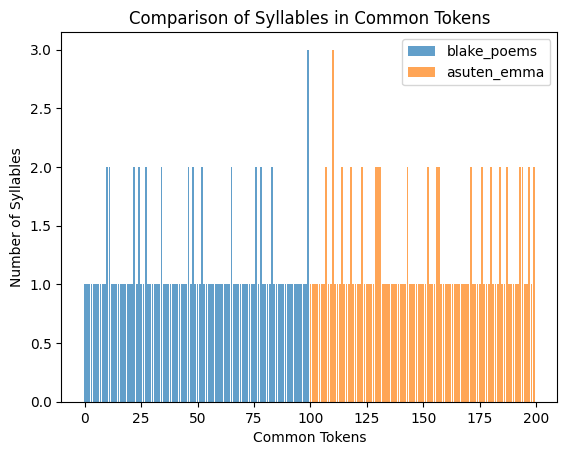

Top 100 Tokens from PDF 1:
['thee', 'like', 'thy', 'thou', 'little', 'night', 'away', 'joy', 'weep', 'happy', 'mother', 'father', 'child', 'day', 'sleep', 'er', 'Sweet', 'see', 'shall', 'bright', 'voice', 'love', 'human', 'every', 'delight', 'upon', 'head', 'never', 'green', 'Love', 'hear', 'sweet', 'care', 'face', 'infant', 'tears', 'heard', 'sit', 'sun', 'birds', 'white', 'Till', 'Little', 'God', 'light', 'fear', 'weeping', 'heart', 'children', 'Thel', 'cloud', 'know', 'morning', 'Oh', 'smiles', 'lay', 'wild', 'tender', 'play', 'vales', 'flowers', 'deep', 'hand', 'sing', 'eyes', 'heaven', 'woe', 'Lyca', 'said', 'Lamb', 'wept', 'morn', 'life', 'LITTLE', 'tree', 'golden', 'sorrow', 'form', 'silent', 'smile', 'bed', 'go', 'holy', 'virgin', 'saw', 'merry', 'arise', 'mild', 'black', 'round', 'boy', 'cry', 'came', 'doth', 'small', 'Thou', 'Mercy', 'Pity', 'grass', 'another']
Top 100 Tokens from PDF 2:
['Mr', 'Emma', 'could', 'would', 'Mrs', 'Miss', 'must', 'Harriet', 'said', 'much', 'Westo

In [3]:

!pip install Pyphen
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg

import re

import pyphen
import matplotlib.pyplot as plt

nltk.download('stopwords')
from collections import Counter

from nltk.corpus import stopwords




def tokenizeText(text):
    # tokenize based on whitespace and punctuation
    tokens = re.findall(r'\b\w+\b', text)
    return tokens


# Function to calculate syllables for a list of words using Pyphen
def calculate_syllables(tokens):
    dic = pyphen.Pyphen(lang='en')
    syllables = [len(dic.inserted(token).split('-')) for token in tokens]
    return syllables


def syllablesCalculation(pdf1, pdf2):
    text1 = pdf1
    text2 = pdf2
    tokens1 = tokenizeText(text1)
    tokens2 = tokenizeText(text2)

    # Remove the common stop words
    stop_words = set(stopwords.words('english'))
    Tokens1sm = [token for token in tokens1 if token.lower() not in stop_words]
    Tokens2sm = [token for token in tokens2 if token.lower() not in stop_words]

    # Now lets count token freq to find most used 100 tokens
    tokenCountsPdf1 = Counter(Tokens1sm)
    tokenCountsPdf2 = Counter(Tokens2sm)

    top100Tokens1 = [token for token, count in tokenCountsPdf1.most_common(100)]
    top100Tokens2 = [token for token, count in tokenCountsPdf2.most_common(100)]

    # Calculate syllables for the top 100 tokens
    syllables1 = calculate_syllables(top100Tokens1)
    syllables2 = calculate_syllables(top100Tokens2)

    # Example: Create a bar chart to compare the number of syllables in common tokens
    plt.bar(range(len(top100Tokens1)), syllables1, label='blake_poems', alpha=0.7)
    plt.bar(range(len(top100Tokens1), len(top100Tokens1) + len(top100Tokens2)), syllables2, label='asuten_emma', alpha=0.7)
    plt.xlabel('Common Tokens')
    plt.ylabel('Number of Syllables')
    plt.title('Comparison of Syllables in Common Tokens')
    plt.legend()
    plt.show()

    return top100Tokens1, top100Tokens2


# Load "Blake's Poems" and "Leaves of Grass" with explicit UTF-8 encoding
blake_poems = gutenberg.raw("blake-poems.txt").encode('utf-8').decode('utf-8')
austen_emma = gutenberg.raw("austen-emma.txt").encode('utf-8').decode('utf-8')

# Save "Blake's Poems" to a text file
with open("blake_poems.txt", "w", encoding="utf-8") as file:
    file.write(blake_poems)

# Save "asuten-emma" to a text file
with open("asuten-emma9.txt", "w", encoding="utf-8") as file:
    file.write(austen_emma)

top100Tokens1, top100Tokens2 = syllablesCalculation(blake_poems, austen_emma)

# Print the top 100 tokens from each PDF file
print("Top 100 Tokens from PDF 1:")
print(top100Tokens1)

print("Top 100 Tokens from PDF 2:")
print(top100Tokens2)
